In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

from utils import *
from models import *
from keras.models import Model
from keras.layers import Input, Dense, Lambda
from keras import backend as K
from keras.utils import plot_model
plt.style.use('ggplot')

Using TensorFlow backend.


# Linear VAE

### Gather Data and format data

In [83]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
image_size = x_train.shape[1]
original_dim = image_size * image_size
x_train = np.reshape(x_train, [-1, original_dim])
x_test = np.reshape(x_test, [-1, original_dim])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

### Model Parameters

In [3]:
input_shape = (original_dim, )
intermediate_dim = 512
batch_size=100
latent_dim = 2
epochs = 25

### Train VAE

In [4]:
vae, encoder, decoder = linear_vae(input_shape, sampling, intermediate_dim, latent_dim)
vae.compile(optimizer='adam')
history = vae.fit(
    x_train, 
    epochs=epochs, 
    batch_size=batch_size, 
    validation_data=(x_test, None), verbose=1)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 13s 224us/step - loss: 0.0655 - val_loss: 0.0533
Epoch 2/25
60000/60000 [==============================] - 12s 205us/step - loss: 0.0506 - val_loss: 0.0483
Epoch 3/25
60000/60000 [==============================] - 12s 204us/step - loss: 0.0472 - val_loss: 0.0459
Epoch 4/25
60000/60000 [==============================] - 13s 212us/step - loss: 0.0453 - val_loss: 0.0443
Epoch 5/25
60000/60000 [==============================] - 12s 201us/step - loss: 0.0439 - val_loss: 0.0430
Epoch 6/25
60000/60000 [==============================] - 12s 203us/step - loss: 0.0427 - val_loss: 0.0423
Epoch 7/25
60000/60000 [==============================] - 12s 202us/step - loss: 0.0419 - val_loss: 0.0415
Epoch 8/25
60000/60000 [==============================] - 12s 207us/step - loss: 

### Plot Results

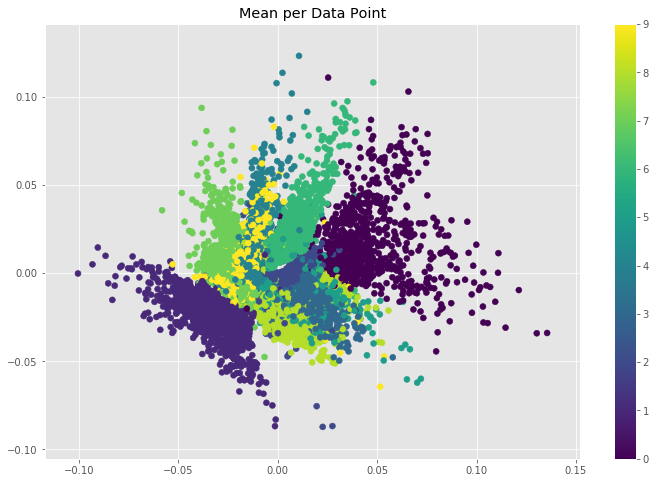

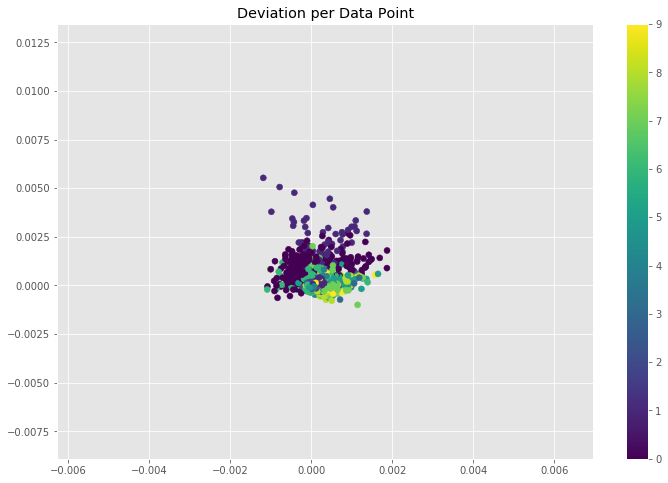

In [55]:
lin_mu, lin_sig, out = encoder.predict(x_test)
plt.figure(figsize=(12,8))
plt.title("Mean per Data Point")
plt.scatter(lin_mu[:,0], lin_mu[:,1], c=y_test)
plt.colorbar()
plt.show()
plt.figure(figsize=(12,8))
plt.title("Deviation per Data Point")
plt.scatter(lin_sig[:,0], lin_sig[:,1], c=y_test)
plt.colorbar()
plt.show()

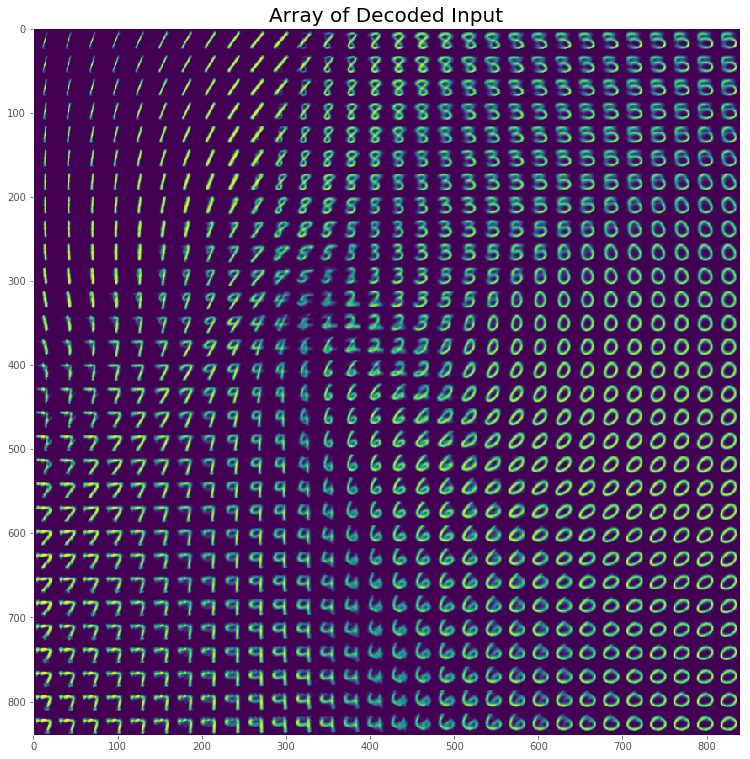

In [85]:
n = 30
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
grid_x = np.linspace(-.05, .07, n)
grid_y = np.linspace(-.05, .07, n)

for i, yi in enumerate(grid_y):
    for j, xi in enumerate(grid_x):
        z = np.array([[xi,yi]])
        out = decoder.predict(z)
        digit = out[0].reshape(28,28)
        figure[i * digit_size: (i + 1) * digit_size, j * digit_size: (j + 1) * digit_size] = digit
plt.figure(figsize=(16,13))
plt.title("Array of Decoded Input", fontsize=20)
ax = plt.gca()
plt.grid()
plt.imshow(figure);

# Convolutional VAE

### Gather Data and format data

In [74]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
image_size = x_train.shape[1]
x_train = np.reshape(x_train, [-1, image_size, image_size, 1])
x_test = np.reshape(x_test, [-1, image_size, image_size, 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

### Model Parameters

In [8]:
input_shape = x_train[0].shape
intermediate_dim = 512
batch_size=100
latent_dim = 2
epochs = 10

### Train VAE

In [9]:
conv_vae, conv_encoder, conv_decoder = conv_vae(input_shape, sampling, intermediate_dim, latent_dim, verbose=True)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
enc_in (InputLayer)             (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 14, 14, 16)   160         enc_in[0][0]                     
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 7, 7, 64)     9280        conv2d_1[0][0]                   
__________________________________________________________________________________________________
flatten_1 (Flatten)             (None, 3136)         0           conv2d_2[0][0]                   
__________________________________________________________________________________________________
dense_8 (D

In [10]:
conv_vae.compile(optimizer='adam')
conv_history = conv_vae.fit(
    x_train, 
    epochs=epochs, 
    batch_size=batch_size, 
    validation_data=(x_test, None), verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 47s 783us/step - loss: 1.7376 - val_loss: 1.3978
Epoch 2/10
60000/60000 [==============================] - 46s 769us/step - loss: 1.3551 - val_loss: 1.3057
Epoch 3/10
60000/60000 [==============================] - 47s 785us/step - loss: 1.2828 - val_loss: 1.2542
Epoch 4/10
60000/60000 [==============================] - 47s 781us/step - loss: 1.2342 - val_loss: 1.2157
Epoch 5/10
60000/60000 [==============================] - 47s 791us/step - loss: 1.2016 - val_loss: 1.1925
Epoch 6/10
60000/60000 [==============================] - 47s 791us/step - loss: 1.1788 - val_loss: 1.1738
Epoch 7/10
60000/60000 [==============================] - 48s 800us/step - loss: 1.1607 - val_loss: 1.1651
Epoch 8/10
60000/60000 [==============================] - 48s 807us/step - loss: 1.1454 - val_loss: 1.1500
Epoch 9/10
60000/60000 [==============================] - 49s 818us/step - loss: 1.1336 - val_

### Plot Results

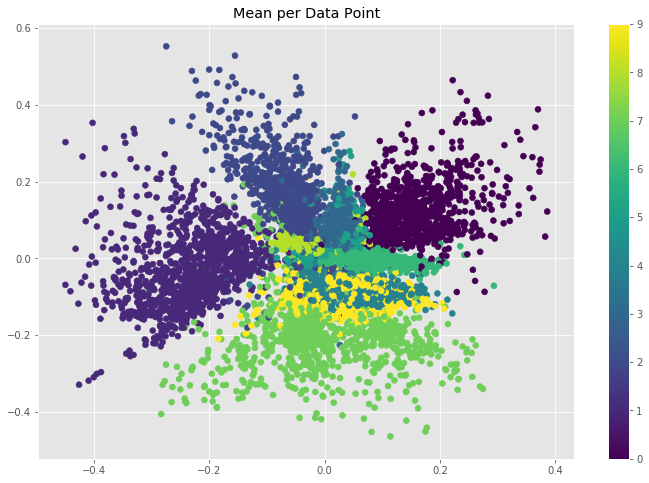

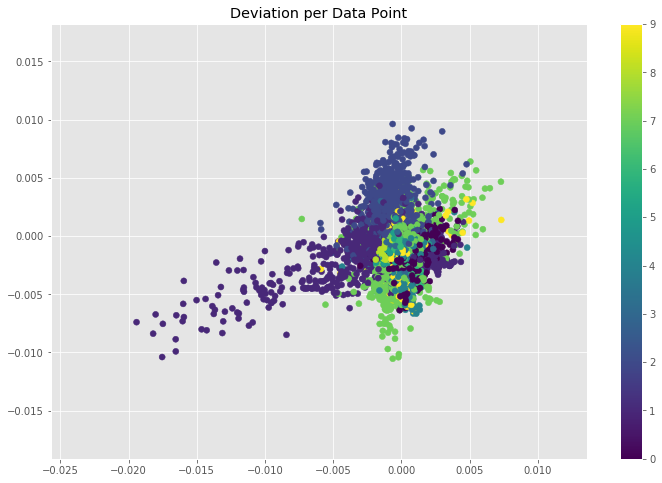

In [75]:
conv_mu, conv_sig, out = conv_encoder.predict(x_test)
plt.figure(figsize=(12,8))
plt.title("Mean per Data Point")
plt.scatter(conv_mu[:,0], conv_mu[:,1], c=y_test)
plt.colorbar()
plt.show()
plt.figure(figsize=(12,8))
plt.title("Deviation per Data Point")
plt.scatter(conv_sig[:,0], conv_sig[:,1], c=y_test)
plt.colorbar()
plt.show()

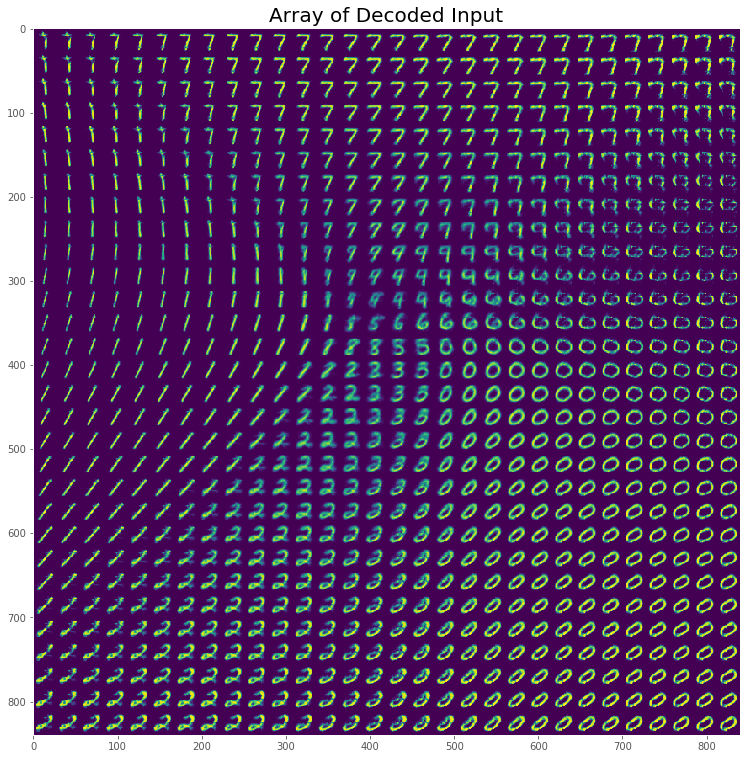

In [82]:
n = 30
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
grid_x = np.linspace(-.5, .5, n)
grid_y = np.linspace(-.5, .7, n)

for i, yi in enumerate(grid_y):
    for j, xi in enumerate(grid_x):
        z = np.array([[xi,yi]])
        out = conv_decoder.predict(z)
        digit = out[0].reshape(28,28)
        figure[i * digit_size: (i + 1) * digit_size, j * digit_size: (j + 1) * digit_size] = digit
plt.figure(figsize=(16,13))
plt.title("Array of Decoded Input", fontsize=20)
plt.grid()
plt.imshow(figure);

# Comparing Results from both methods

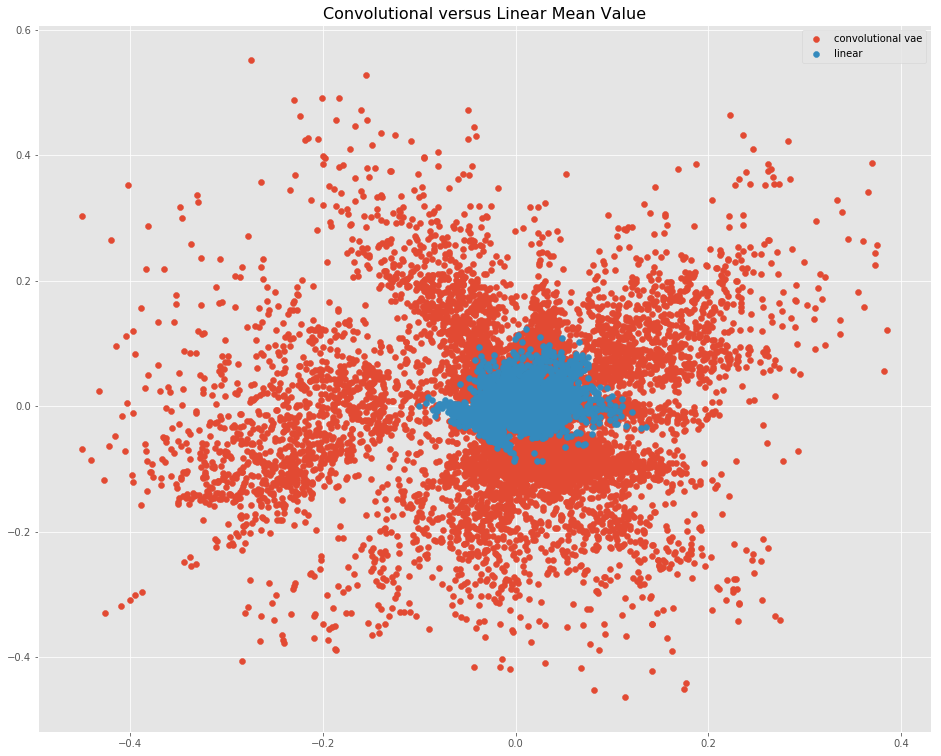

In [81]:
plt.figure(figsize=(16,13))
plt.scatter(conv_mu[:,0], conv_mu[:,1], label='convolutional vae')
plt.scatter(lin_mu[:,0], lin_mu[:,1], label='linear')
plt.legend()
plt.title("Convolutional versus Linear Mean Value", fontsize=16);

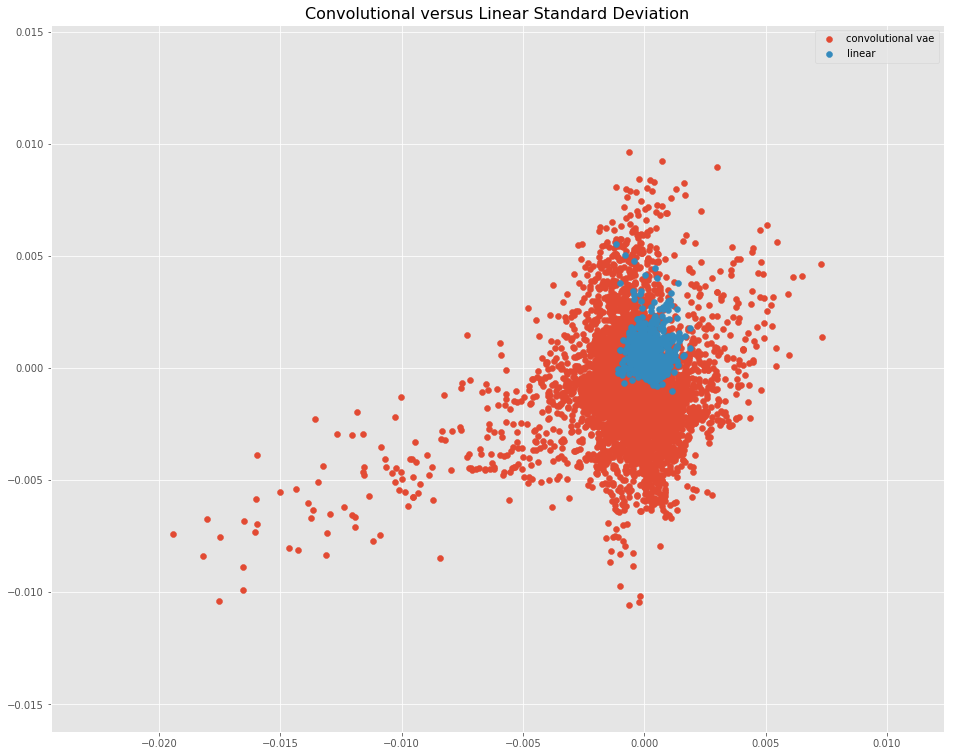

In [80]:
plt.figure(figsize=(16,13))
plt.scatter(conv_sig[:,0], conv_sig[:,1], label='convolutional vae')
plt.scatter(lin_sig[:,0], lin_sig[:,1], label='linear')
plt.legend()
plt.title("Convolutional versus Linear Standard Deviation", fontsize=16);